In [3]:
import pandas as pd
df = pd.read_csv("../../data/ai4i2020.csv") 

In [5]:
print("Shape:", df.shape)
display(df.head())  

Shape: (10000, 14)


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [7]:
# Data types and missing values
print("\nInfo:")
print(df.info())


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), i

In [8]:
# Summary statistics
print("\nDescribe:")
display(df.describe())



Describe:


,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [10]:
failure_cols = ['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']
print(df[failure_cols].sum())

Machine failure    339
TWF                 46
HDF                115
PWF                 95
OSF                 98
RNF                 19
dtype: int64


In [ ]:
# Check class balance
print("\nMachine failure distribution:")
print(df['Machine failure'].value_counts(normalize=True) * 100)


Machine failure distribution:
Machine failure
0    96.61
1     3.39
Name: proportion, dtype: float64


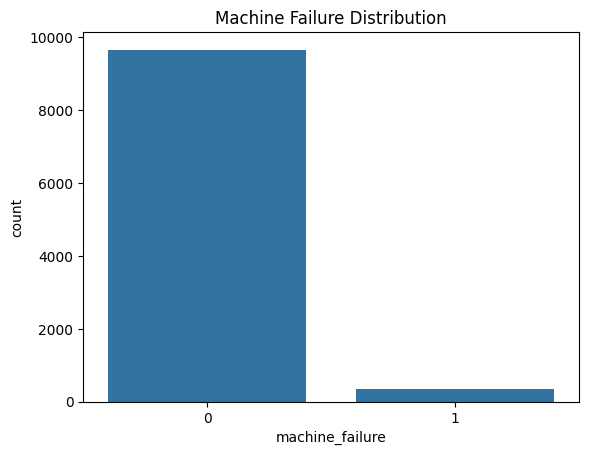

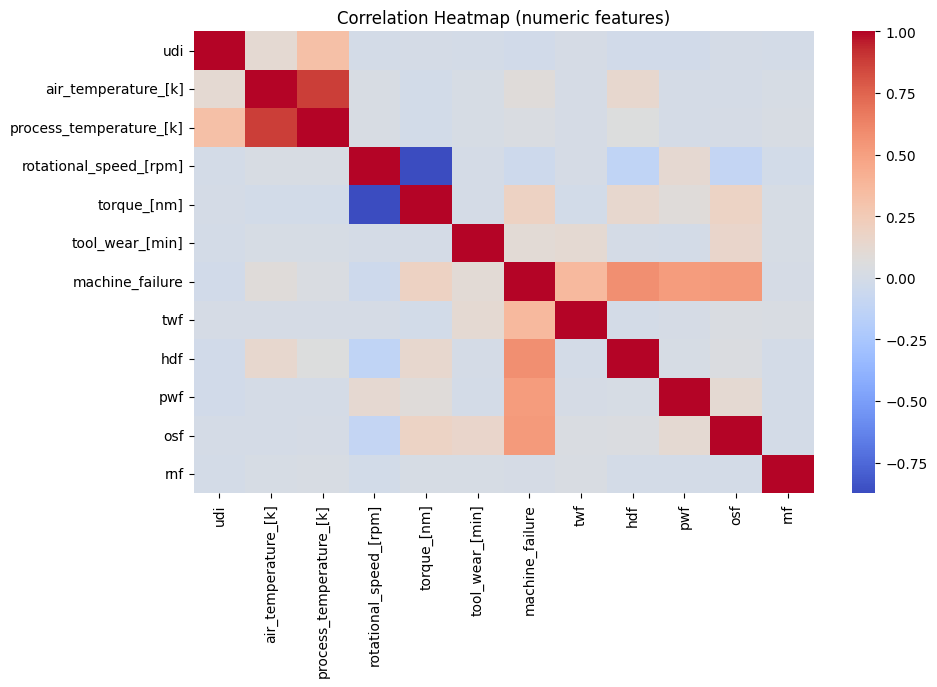

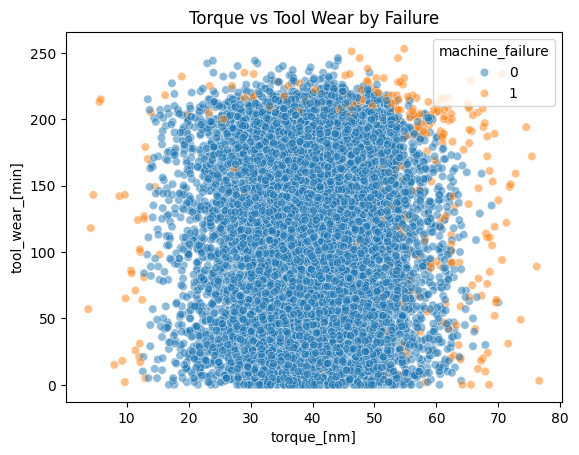

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: clean column names once to avoid space/case issues
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Failure distribution
sns.countplot(x="machine_failure", data=df)
plt.title("Machine Failure Distribution")
plt.show()

# Correlation heatmap (numeric columns only)
num_df = df.select_dtypes(include="number")
plt.figure(figsize=(10,6))
sns.heatmap(num_df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap (numeric features)")
plt.show()

# Torque vs Tool Wear (common failure signals)
sns.scatterplot(x="torque_[nm]", y="tool_wear_[min]", hue="machine_failure", data=df, alpha=0.5)
plt.title("Torque vs Tool Wear by Failure")
plt.show()

# Observations from Visuals
1. Failure Distribution
- Almost all samples are non-failures (class 0).
- Failures (class 1) are ~4% → strong class imbalance.
- This means you’ll need techniques like SMOTE, class weights, or anomaly detection during ML.

2. Correlation Heatmap
- Air temperature and Process temperature are strongly correlated (expected, process temp = air temp + offset).
- Torque and Rotational speed show some negative correlation (physics-driven).
- Failures don’t show very high linear correlation → meaning ML models (like XGBoost) will be useful to capture non-linear patterns.

3. Torque vs Tool Wear by Failure
- Failures (orange) are concentrated at higher torque and higher tool wear values.
- Suggests that wear + torque interaction is a key risk factor.
- This matches real-world predictive maintenance logic.